# Hitter

In [15]:
df_hitter_perf = pd.read_csv('hitter_perf.csv', index_col=0)
df_hitter_etc = pd.read_csv('hitter_etc.csv', index_col=0)

In [16]:
df_hitter_perf.columns,df_hitter_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'년도', u'AVG_A',
        u'OBP_A', u'SLG_A', u'OPS_A', u'wRC+_A', u'WAR_A', u'HR%_A', u'BB%_A',
        u'K%_A', u'BB/K_A', u'IsoP_A', u'IsoD_A', u'BIPA_A', u'Spd_A', u'PSN_A',
        u'wOBA_A', u'wRC_A', u'wRC/27_A', u'wRAA_A', u'AVG_B', u'OBP_B',
        u'SLG_B', u'OPS_B', u'wRC+_B', u'WAR_B', u'HR%_B', u'BB%_B', u'K%_B',
        u'BB/K_B', u'IsoP_B', u'IsoD_B', u'BIPA_B', u'Spd_B', u'PSN_B',
        u'wOBA_B', u'wRC_B', u'wRC/27_B', u'wRAA_B'],
       dtype='object'),
 Index([u'Name', u'Year', u'BirthYear', u'Age', u'Hometown', u'Captain',
        u'NationalMember', u'Marriage', u'Surgery', u'PreviousTeam', u'NewTeam',
        u'Salary', u'Total', u'Period', u'Transfer', u'RewardPlayer',
        u'Position', u'GoldenGlove', u'Rookie', u'AllStar'],
       dtype='object'))

In [17]:
dfX_hitter_perf = df_hitter_perf[['AVG_A', 'OBP_A', 'SLG_A', 'WAR_A', 'HR%_A', 'BB%_A', 'K%_A', 'BIPA_A', 'Spd_A', 'PSN_A', 'wOBA_A', 'wRC_A', 'wRAA_A', 'AVG_B', 'OBP_B', 'SLG_B', 'WAR_B', 'HR%_B', 'BB%_B', 'K%_B', 'BIPA_B', 'Spd_B', 'PSN_B', 'wOBA_B', 'wRC_B', 'wRAA_B']]
dfX_hitter_etc = df_hitter_etc[['Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_hitter = df_hitter_etc['Salary']


In [24]:
idx = dfy_hitter == '-'
df_hitter = pd.concat([dfX_hitter_perf, dfX_hitter_etc, dfy_hitter], axis=1)
df_hitter = df_hitter.drop(df_hitter.index[idx]).astype(float) 
df_hitter = sm.add_constant(df_hitter)

# 1. OLS

In [25]:
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression().fit(df_hitter.ix[:,:-1], df_hitter.ix[:,-1])
model_sm = sm.OLS(df_hitter.ix[:,-1], df_hitter.ix[:,:-1])
result_sm = model_sm.fit()

In [6]:
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5.851
Date:                Sat, 04 Mar 2017   Prob (F-statistic):           1.15e-11
Time:                        08:42:18   Log-Likelihood:                -298.20
No. Observations:                 123   AIC:                             668.4
Df Residuals:                      87   BIC:                             769.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.5322     21.267      0.

# 2. Pairplot

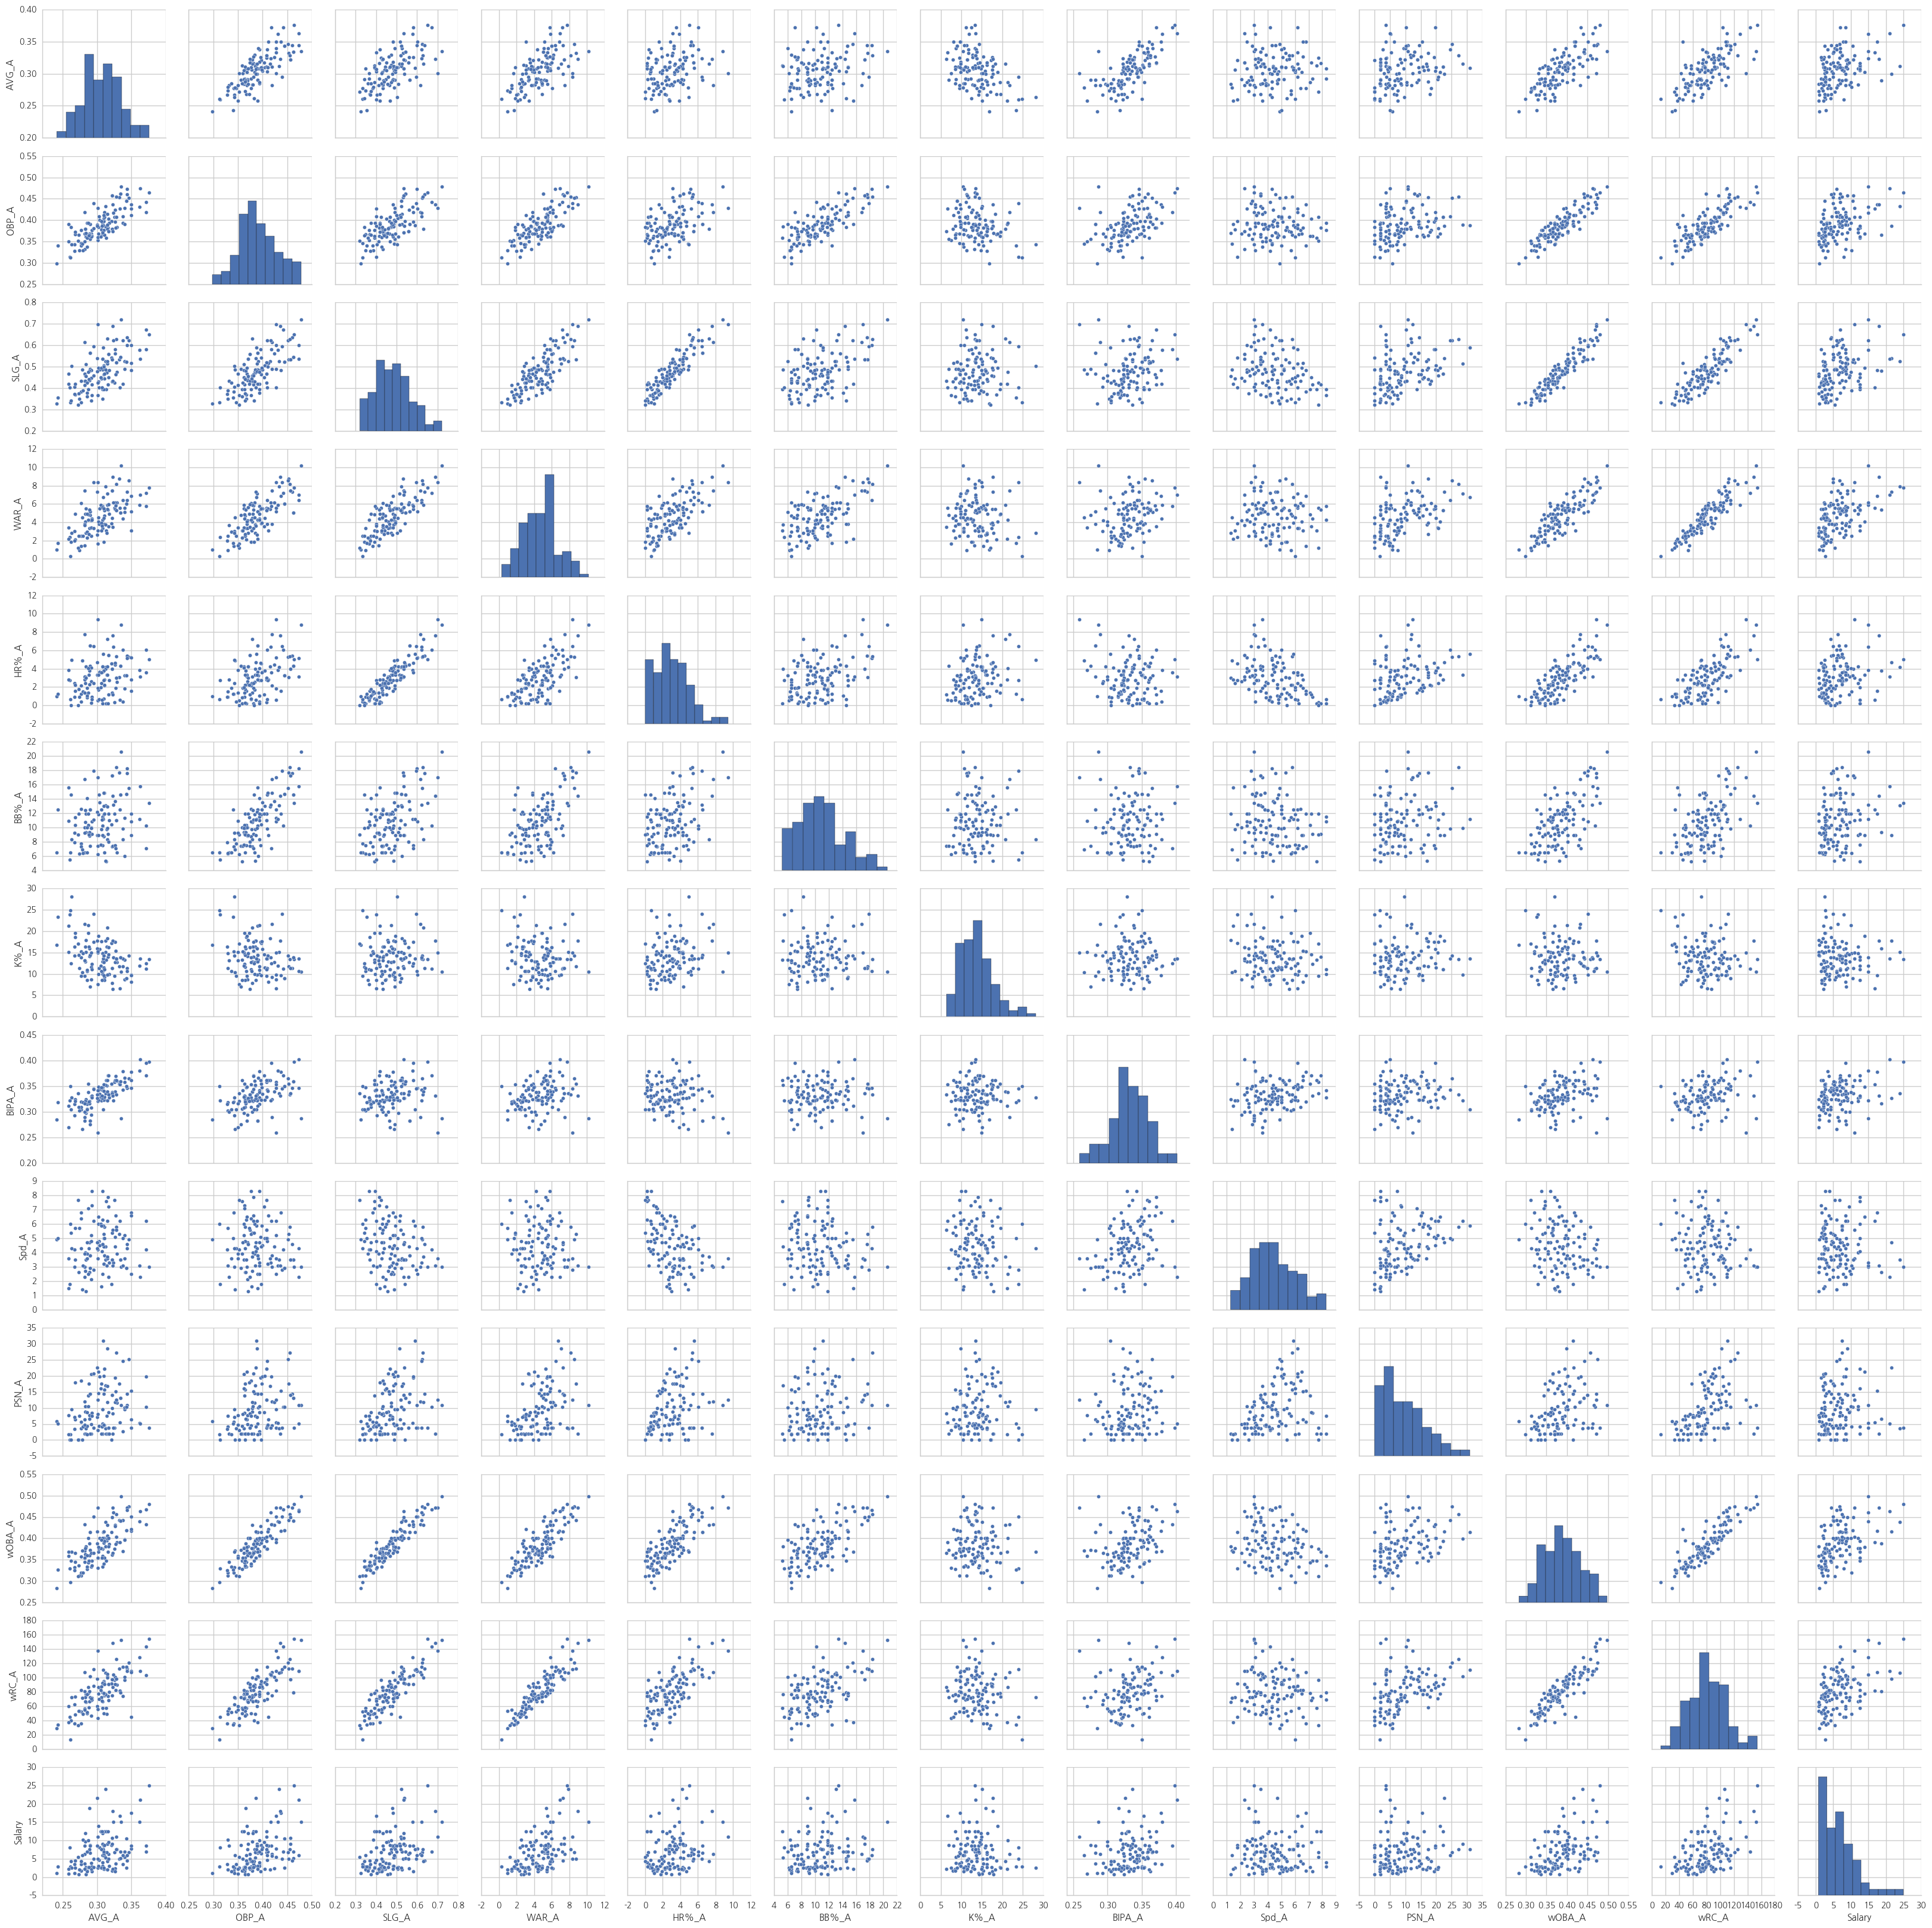

In [14]:
dff = pd.concat([df_hitter.ix[:,1:13], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

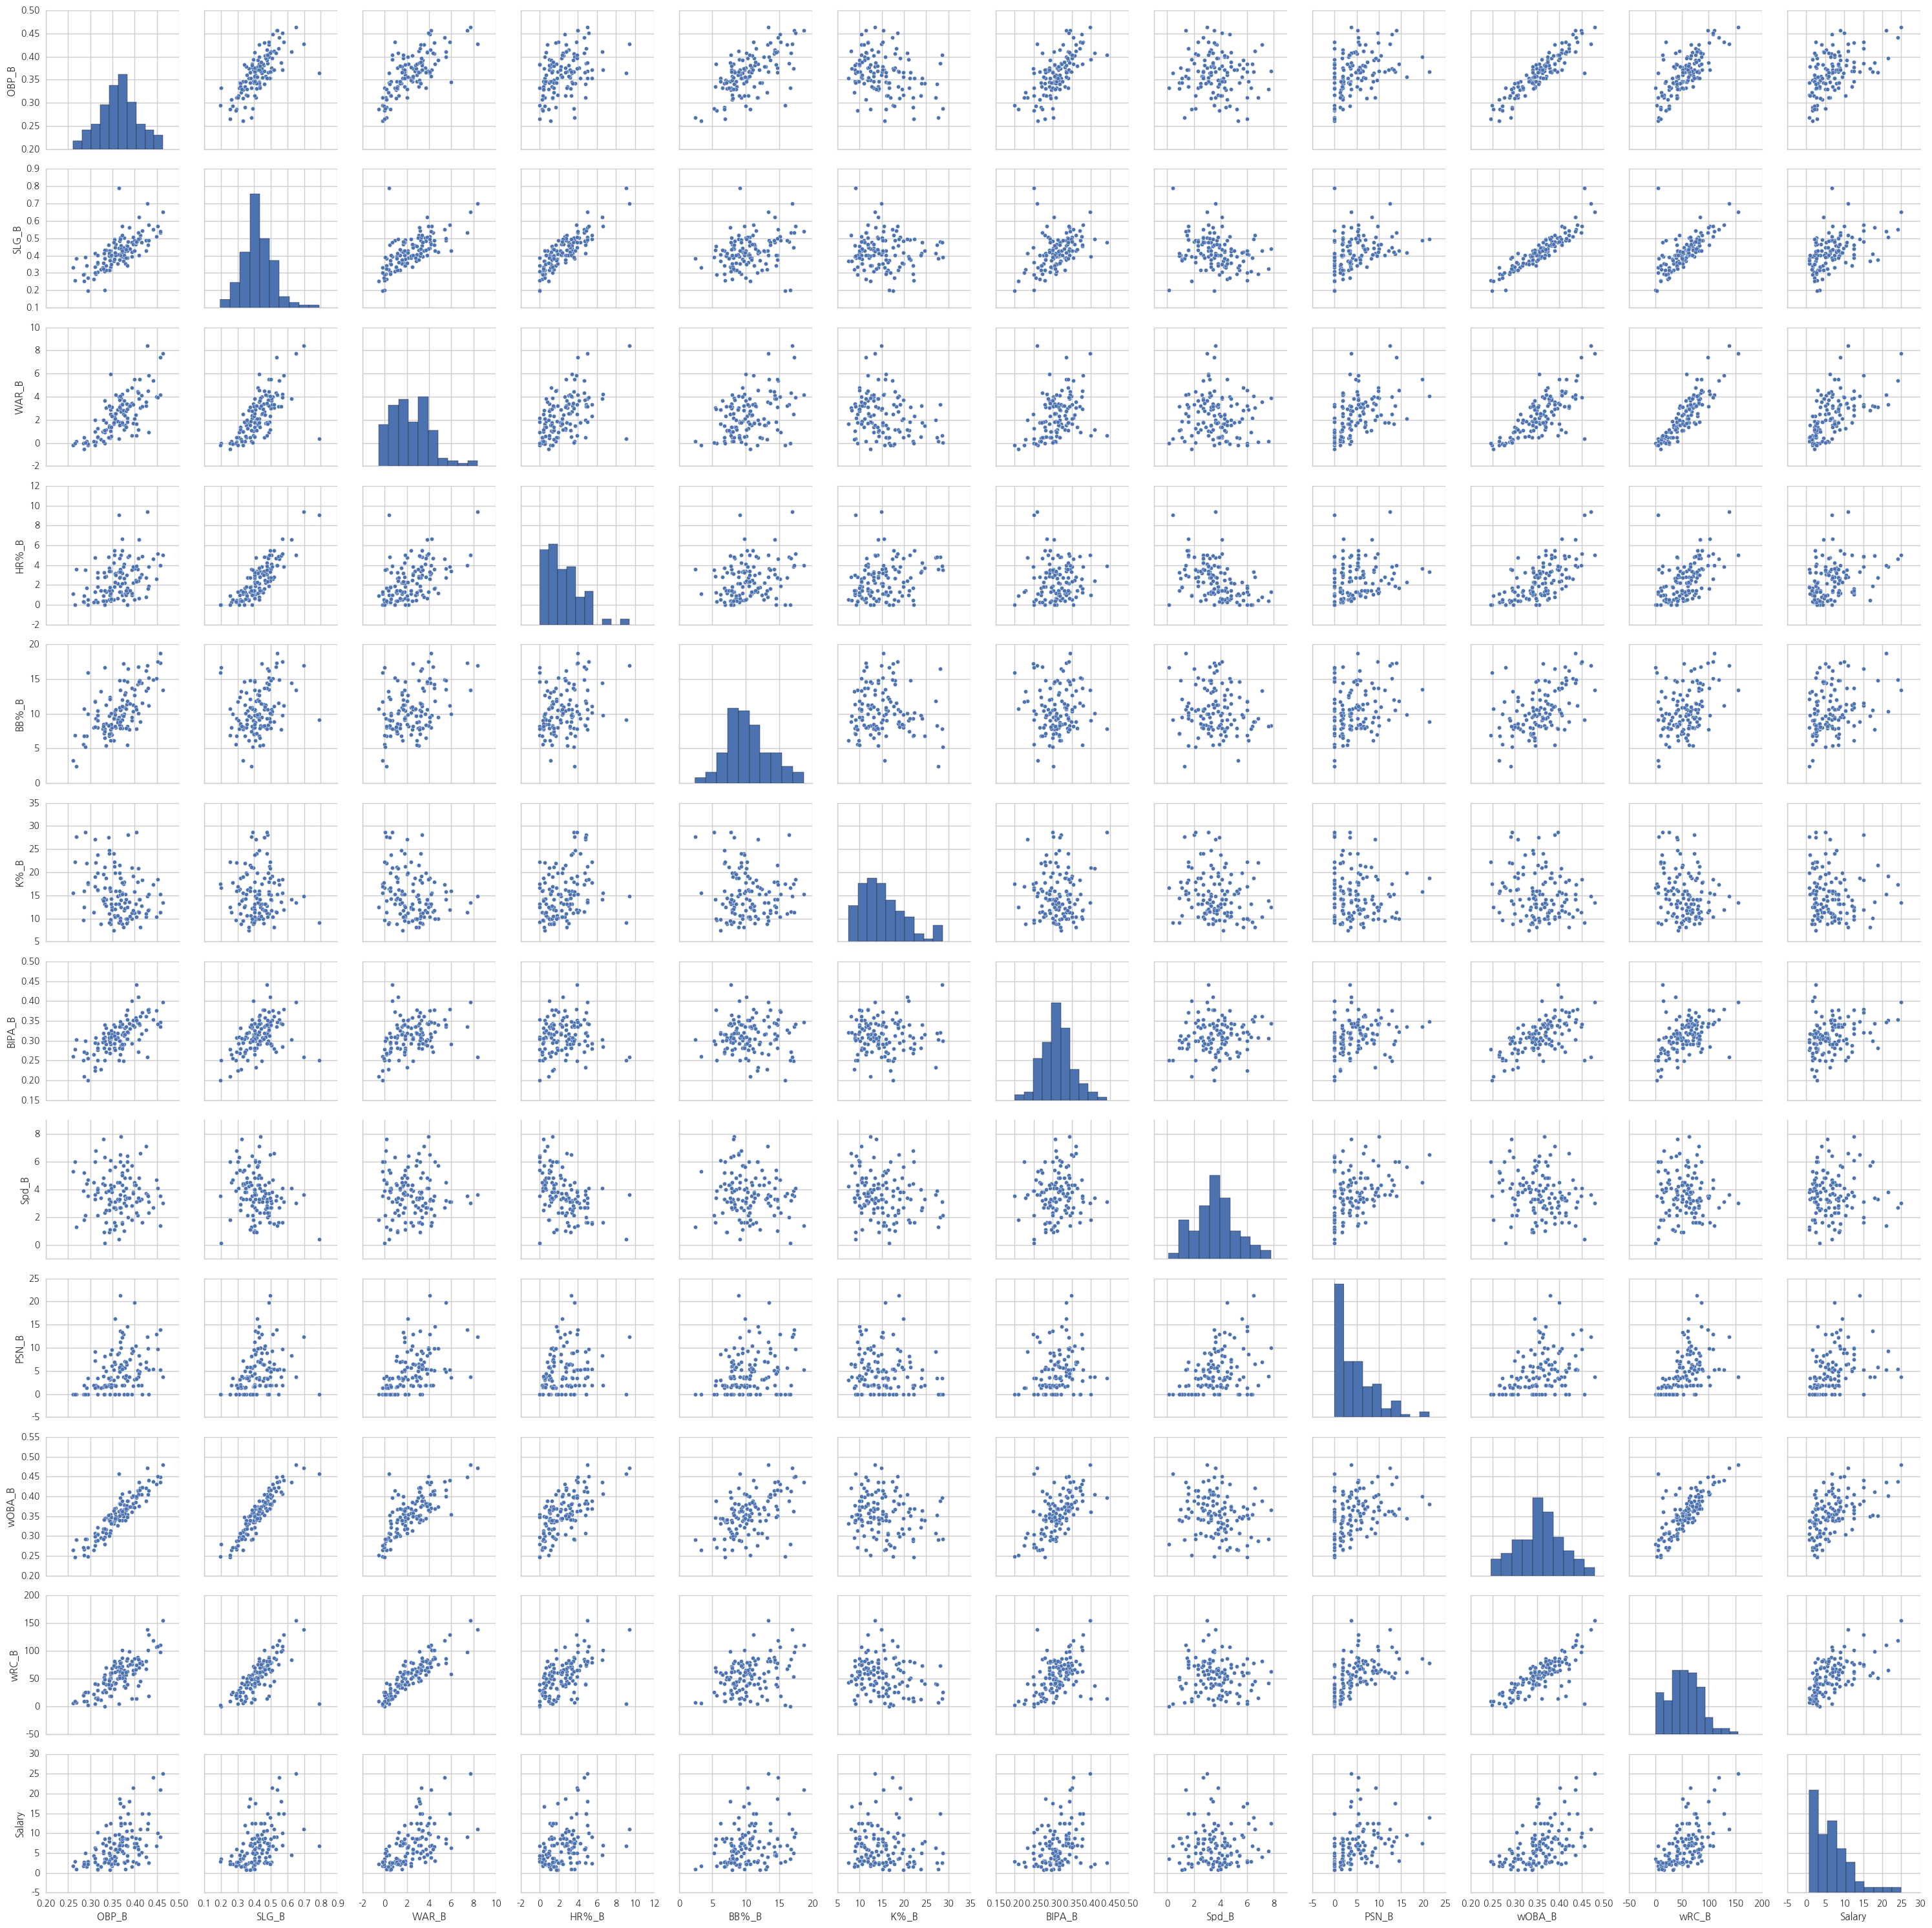

In [15]:
dff = pd.concat([df_hitter.ix[:,-22:-11], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

# ETC 데이터 특징분석,  제거할 변수 선택

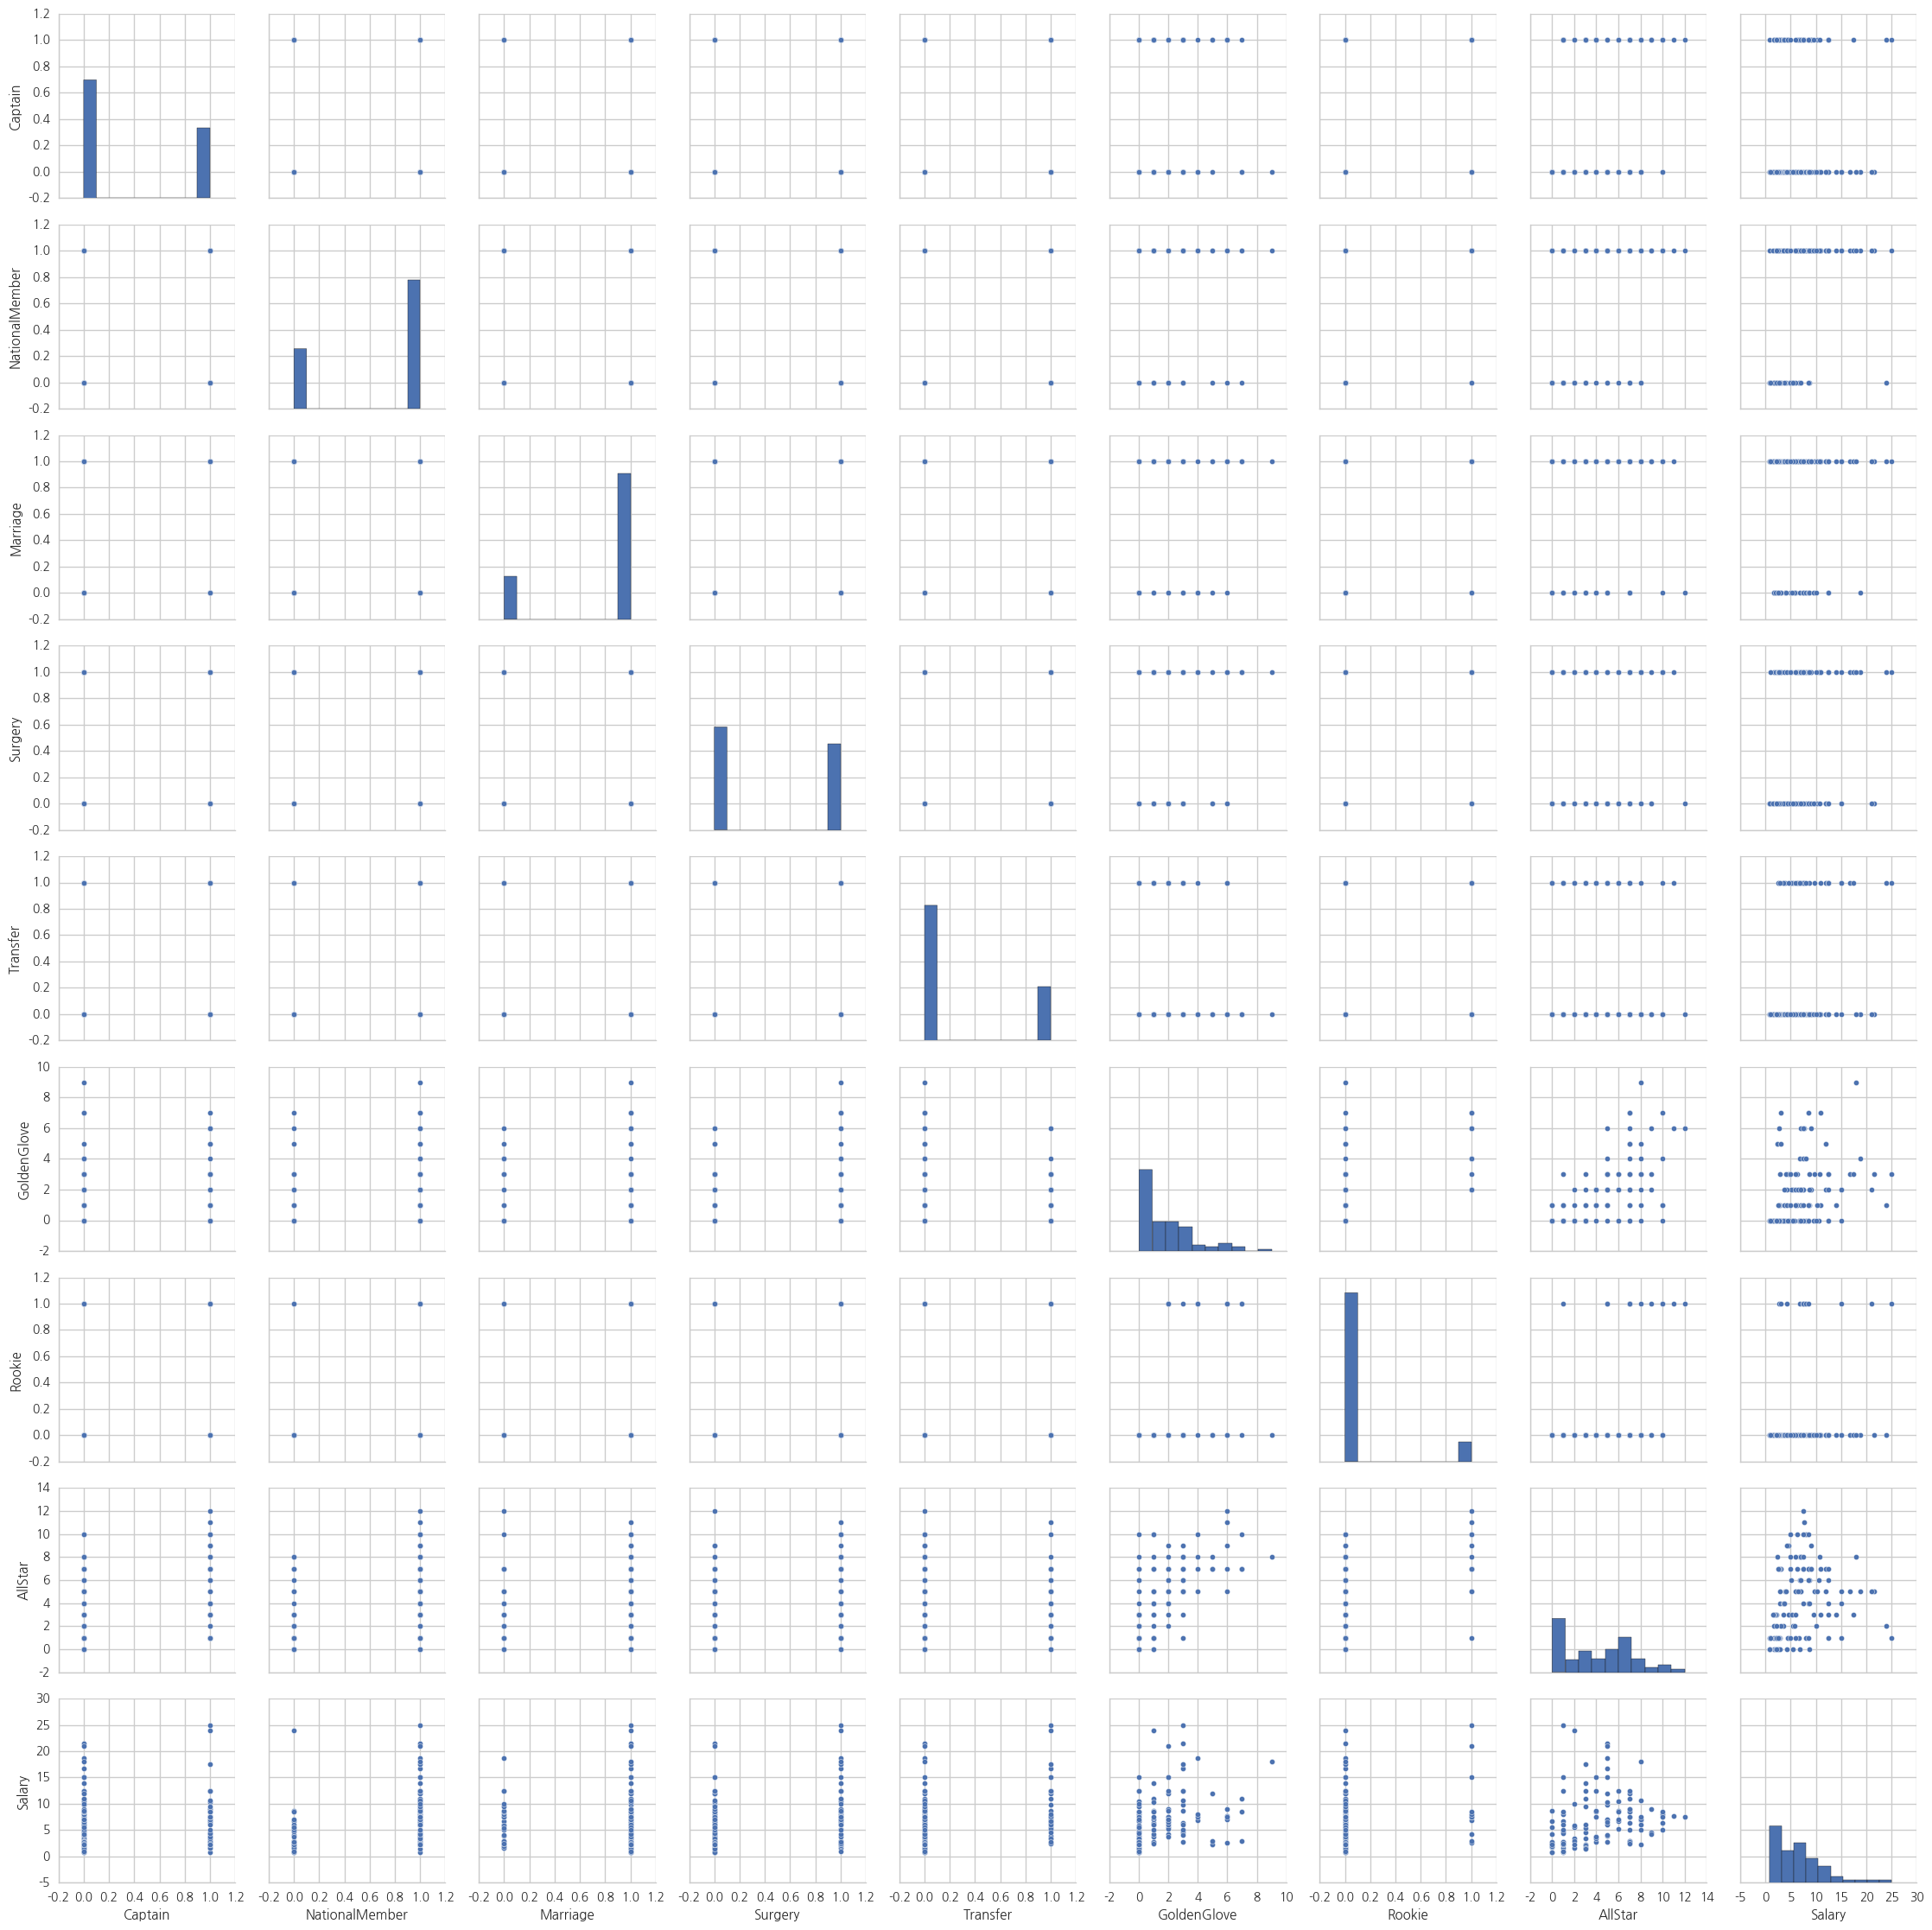

In [60]:
dff = pd.concat([df_hitter.ix[:,-9:-1], df_hitter.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

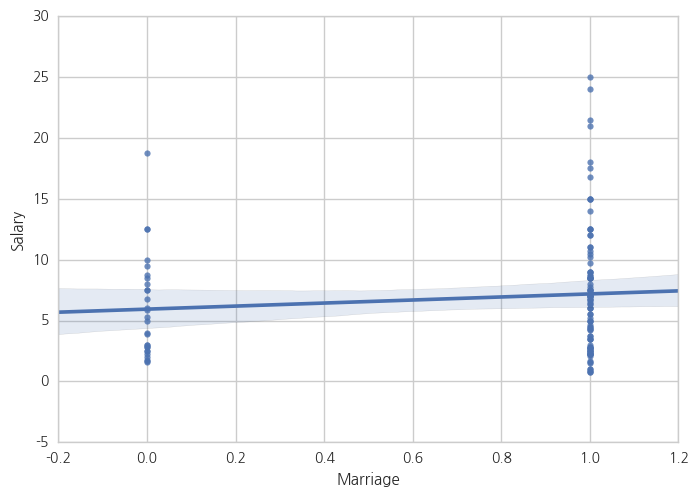

In [11]:
sns.regplot(x= df_hitter["Marriage"], y = df_hitter["Salary"] ,data= df_hitter)

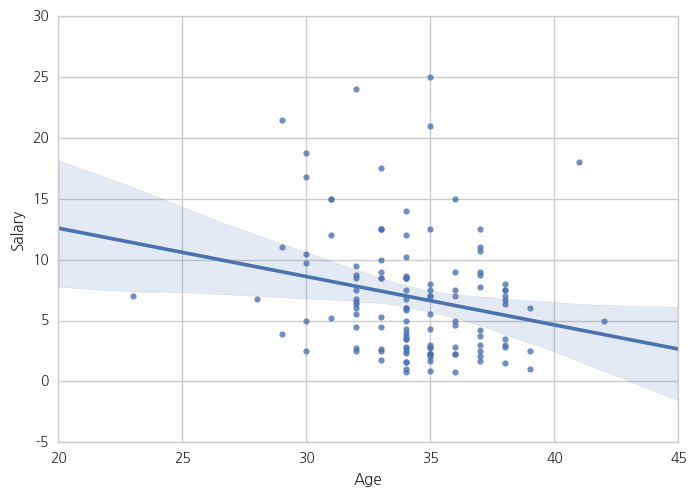

In [12]:
sns.regplot(x= df_hitter["Age"], y = df_hitter["Salary"], data= df_hitter)

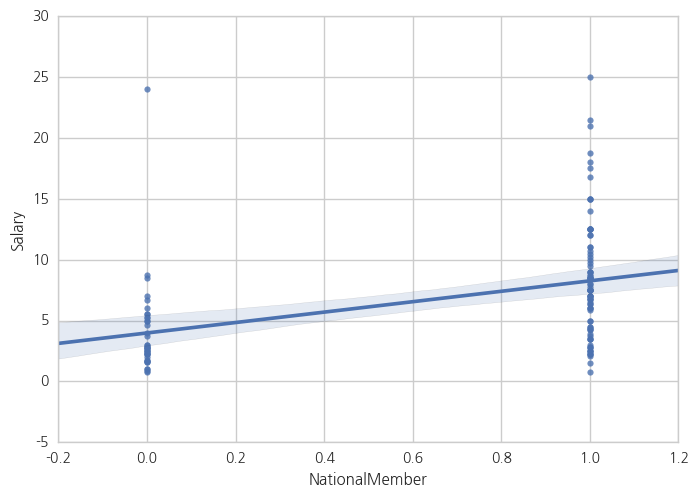

In [13]:
sns.regplot(x= df_hitter["NationalMember"], y = df_hitter["Salary"], data= df_hitter)

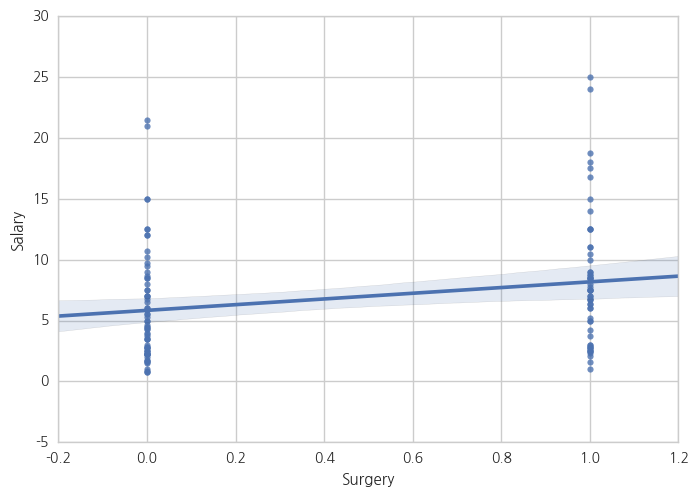

In [14]:
sns.regplot(x= df_hitter["Surgery"], y = df_hitter["Salary"], data= df_hitter)

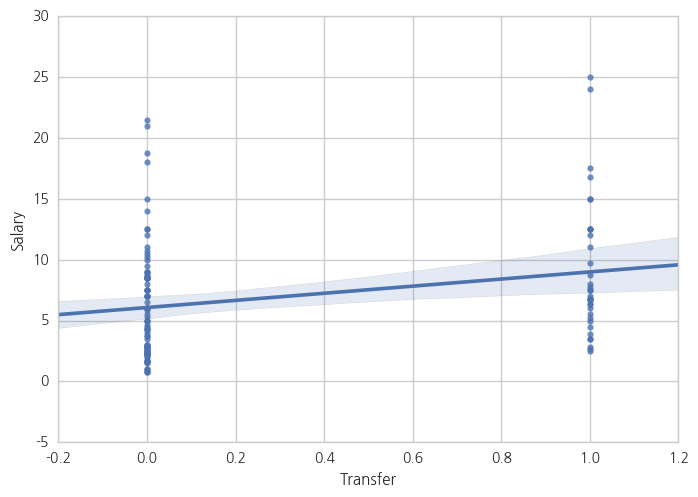

In [15]:
sns.regplot(x= df_hitter["Transfer"], y = df_hitter["Salary"], data= df_hitter)

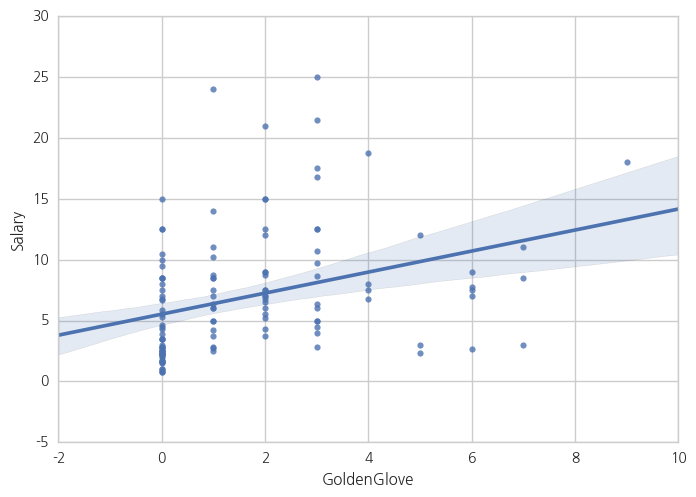

In [16]:
sns.regplot(x= df_hitter["GoldenGlove"], y = df_hitter["Salary"], data= df_hitter)

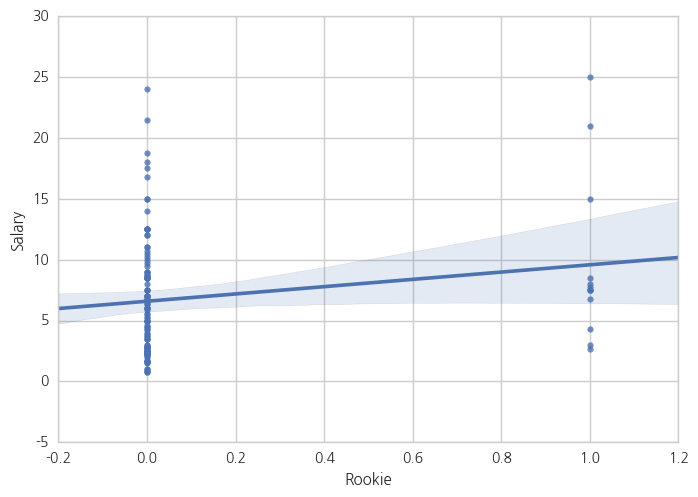

In [17]:
sns.regplot(x= df_hitter["Rookie"], y = df_hitter["Salary"], data= df_hitter)

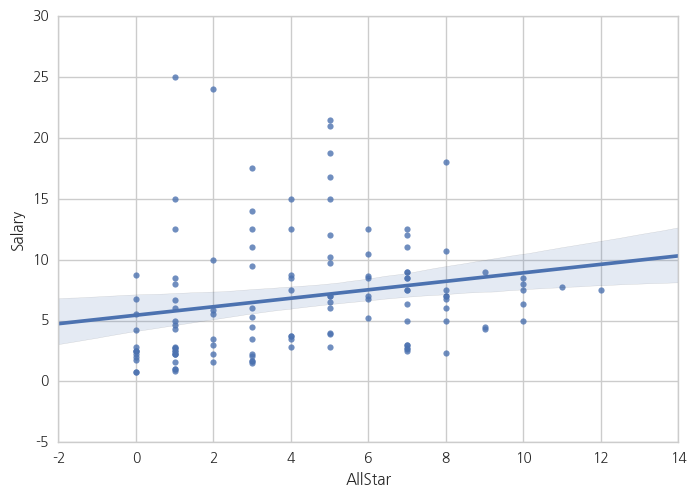

In [18]:
sns.regplot(x= df_hitter["AllStar"], y = df_hitter["Salary"], data= df_hitter)

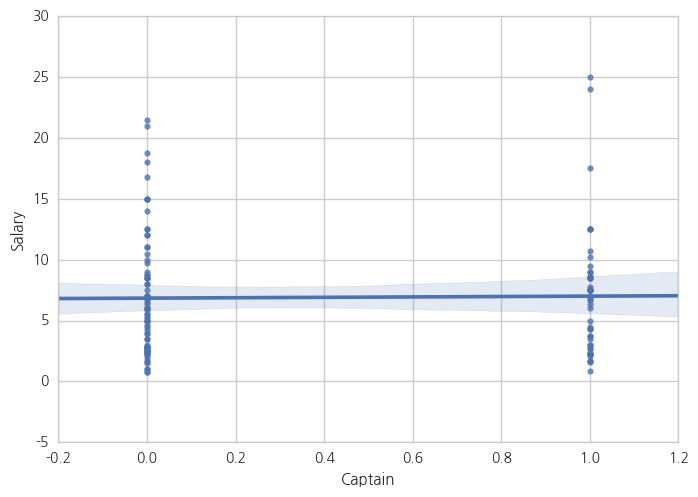

In [19]:
sns.regplot(x= df_hitter["Captain"], y = df_hitter["Salary"], data= df_hitter)

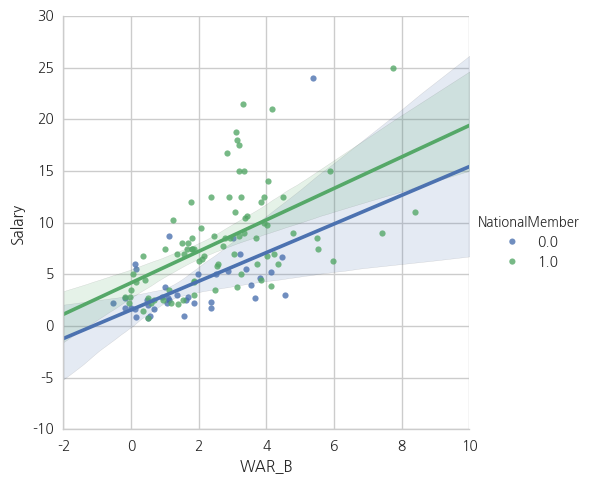

In [20]:
sns.lmplot(x= "WAR_B", y = "Salary", hue= "NationalMember", data = df_hitter)

# Cross validation - 교차검증

In [ ]:
# 과체적화 여부 확인

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
model = LinearRegression()
cv = KFold(100, 10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores
scores.mean()

# 3.  로그변환 

In [7]:
#로그변환
df_hitter1 = df_hitter.copy()

df_hitter1["LogHR%_A"]= np.log(df_hitter1["HR%_A"]+0.00012)
df_hitter1["LogPSN_A"]= np.log(df_hitter1["PSN_A"]+0.00012)
df_hitter1["LogK%_A"]= np.log(df_hitter1["K%_A"]+0.00012)
df_hitter1["LogHR%_B"]= np.log(df_hitter1["HR%_B"]+0.00012)
df_hitter1["LogPSN_B"]= np.log(df_hitter1["PSN_B"]+0.00012)
del df_hitter1["HR%_A"]
del df_hitter1["PSN_A"]
del df_hitter1["K%_A"]
del df_hitter1["HR%_B"]
del df_hitter1["PSN_B"]
del df_hitter1["Salary"]
idx = dfy_hitter == '-'
df_hitter1 = pd.concat([df_hitter1, dfy_hitter], axis=1)
df_hitter1 = df_hitter1.drop(df_hitter1.index[idx]).astype(float)

In [8]:
df_hitter1["LogAge"]= np.log(df_hitter1["Age"]+0.00012)
del df_hitter1["Age"]
df_hitter1["LogSalary"]= np.log(df_hitter1["Salary"]+0.00012)
del df_hitter1["Salary"]


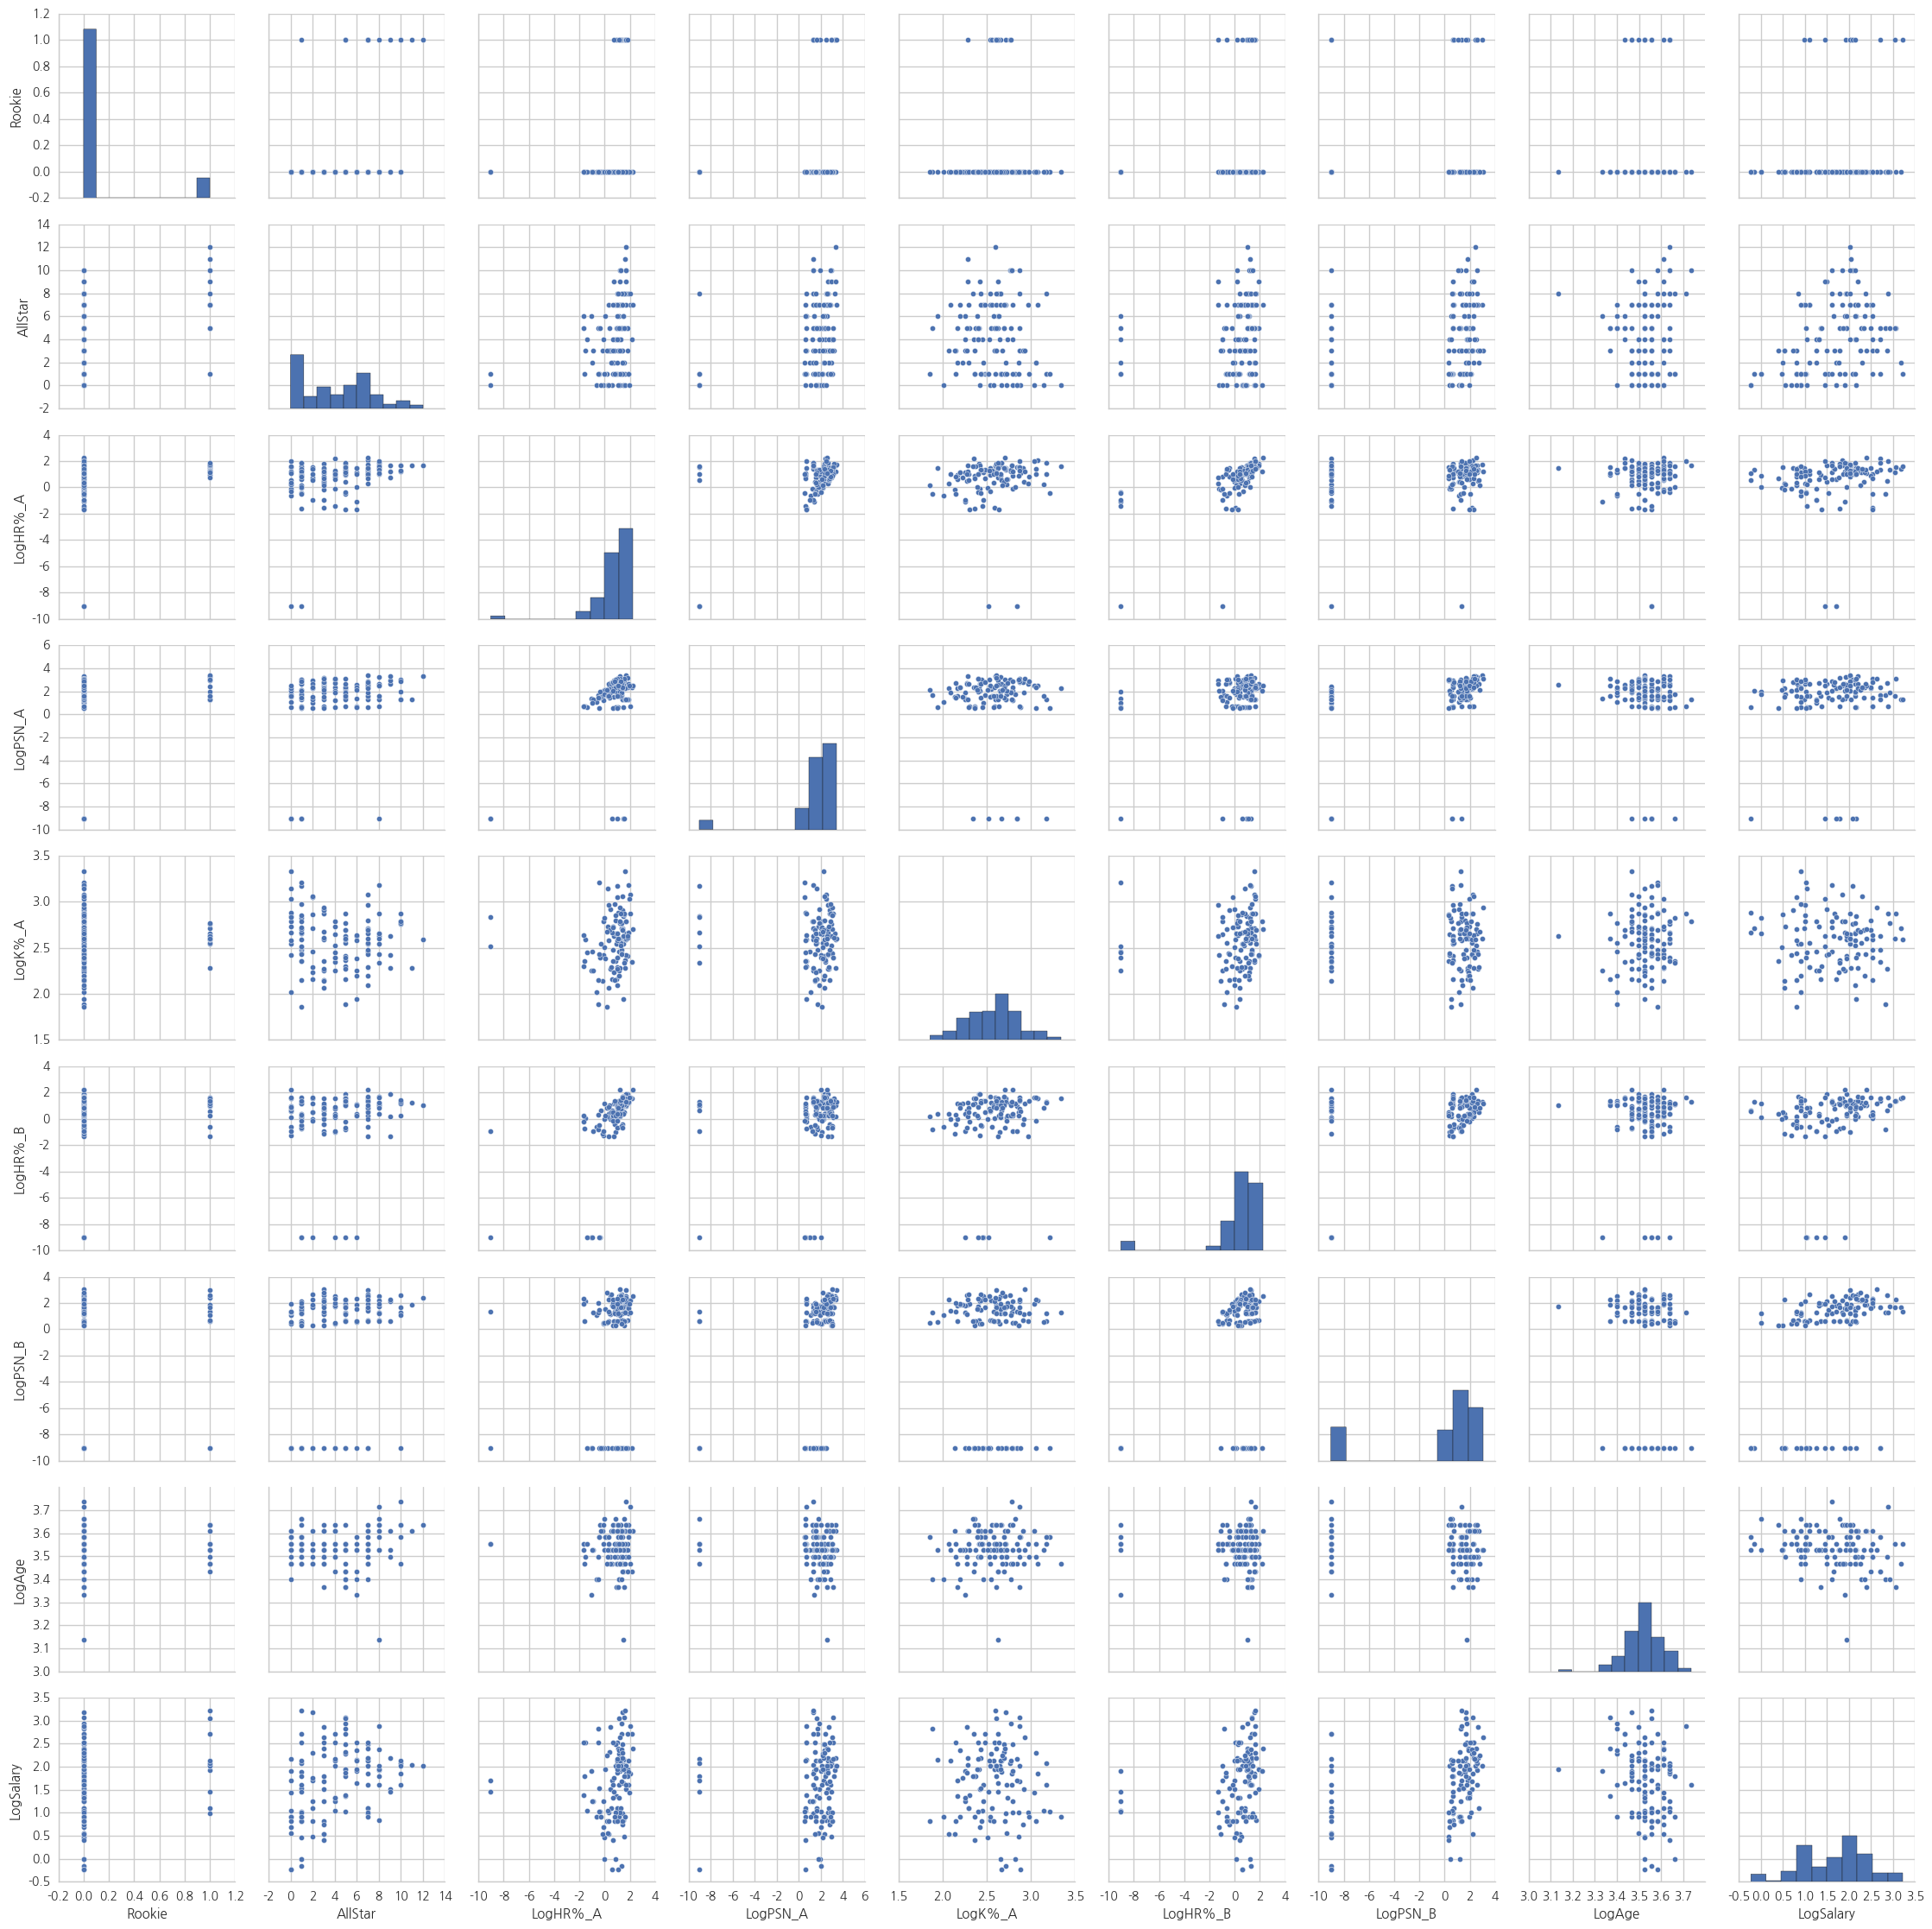

In [9]:
dff = pd.concat([df_hitter1.ix[:,-9:-1], df_hitter1.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

In [112]:
df_hitter1

,const,AVG_A,OBP_A,SLG_A,WAR_A,BB%_A,BIPA_A,Spd_A,wOBA_A,wRC_A,...,Transfer,GoldenGlove,Rookie,AllStar,LogHR%_A,LogPSN_A,LogK%_A,LogHR%_B,LogPSN_B,Salary
1,1.0,0.284,0.362,0.510,5.50,9.3,0.297,3.5,0.378,76.4,...,1.0,6.0,1.0,7.0,1.446947,1.292017,2.714703,1.413452,0.631336,2.67
2,1.0,0.332,0.453,0.533,8.75,17.7,0.355,5.3,0.442,112.4,...,1.0,3.0,0.0,7.0,1.131441,2.861636,2.459599,1.355866,2.558786,5.00
3,1.0,0.346,0.452,0.624,8.56,15.5,0.365,4.9,0.474,121.4,...,1.0,4.0,1.0,8.0,1.663949,3.229227,2.660268,0.970824,2.558786,6.80
4,1.0,0.301,0.353,0.367,1.63,6.2,0.321,4.2,0.331,43.0,...,1.0,0.0,0.0,0.0,-0.615964,1.098652,2.014919,-0.615964,1.098652,2.50
5,1.0,0.282,0.419,0.615,7.47,16.8,0.289,3.0,0.432,107.7,...,1.0,3.0,0.0,7.0,2.046417,2.478228,3.077318,1.562371,2.210483,6.33
6,1.0,0.340,0.428,0.490,5.56,11.3,0.358,5.2,0.398,96.6,...,1.0,2.0,0.0,2.0,0.615251,2.248142,2.163337,0.010069,1.791779,5.50
7,1.0,0.372,0.442,0.672,7.18,10.2,0.371,4.2,0.468,143.8,...,1.0,1.0,0.0,5.0,1.800078,2.326313,2.415924,1.891623,0.667891,7.00
8,1.0,0.325,0.408,0.424,5.55,11.9,0.358,7.7,0.376,97.1,...,1.0,2.0,0.0,6.0,-1.078457,1.350698,2.251304,-9.028019,-9.028019,6.77
9,1.0,0.335,0.478,0.720,10.19,20.6,0.287,3.0,0.498,152.7,...,1.0,2.0,0.0,4.0,2.177035,2.377704,2.351387,1.576940,-9.028019,15.00
10,1.0,0.283,0.379,0.458,4.09,10.7,0.300,2.7,0.363,72.5,...,1.0,3.0,0.0,5.0,1.134661,2.166779,2.549455,1.211977,2.182688,9.75


In [133]:
model_sm1 = sm.OLS(df_hitter1.ix[:,-1], df_hitter1.ix[:,:-1])
result_sm1 = model_sm1.fit()
print(result_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     5.809
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           1.38e-11
Time:                        11:41:50   Log-Likelihood:                -298.51
No. Observations:                 123   AIC:                             669.0
Df Residuals:                      87   BIC:                             770.3
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             12.1310     19.628      0.

# 4. Heatmap 

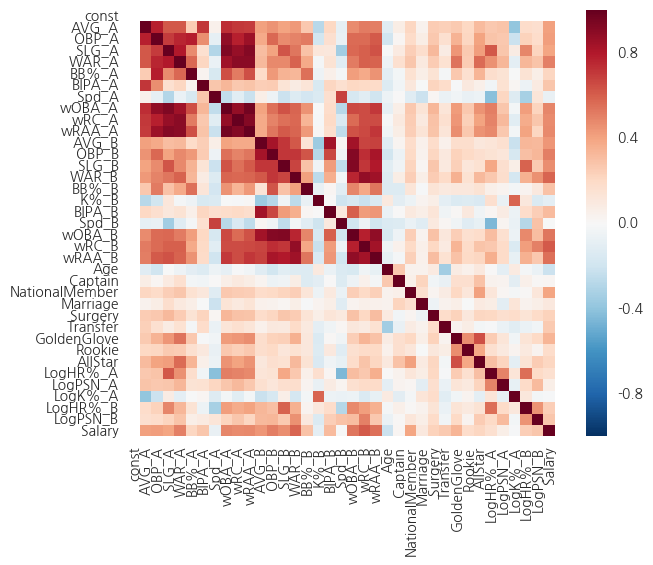

In [134]:
cormat = df_hitter1.corr()
sns.heatmap(cormat, square=True)
plt.show()

## SLG_A,  wOBA_A,  wOBA_B 제거 - 1차


In [135]:
del df_hitter1["SLG_A"]
del df_hitter1["wOBA_A"]
del df_hitter1["wOBA_B"]


In [136]:
model_sm1 = sm.OLS(df_hitter1.ix[:,-1], df_hitter1.ix[:,:-1])
result_sm1 = model_sm1.fit()
print(result_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5.556
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           6.68e-11
Time:                        11:42:02   Log-Likelihood:                -305.56
No. Observations:                 123   AIC:                             677.1
Df Residuals:                      90   BIC:                             769.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             32.3759     19.129      1.

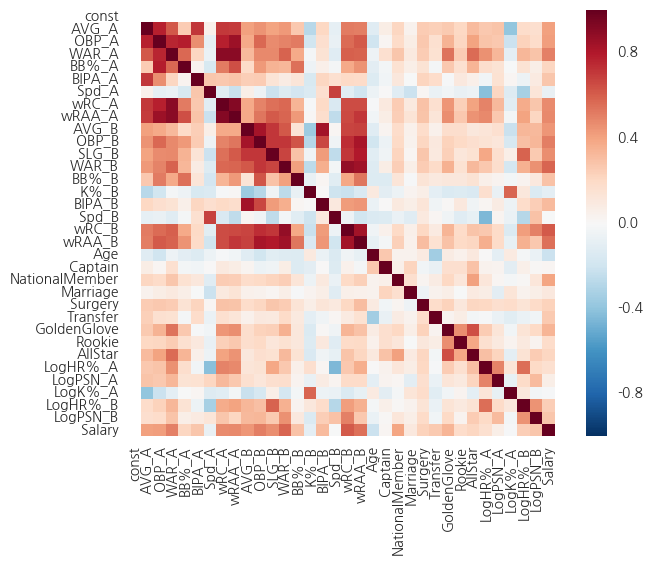

In [137]:
cormat = df_hitter1.corr()
sns.heatmap(cormat, square=True)
plt.show()

## wRC_A,wRC_B 제거 - 2차   

In [138]:
del df_hitter1["wRC_A"]
del df_hitter1["wRC_B"]
df_hitter2 = df_hitter1
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     4.667
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           6.04e-09
Time:                        11:42:58   Log-Likelihood:                -315.73
No. Observations:                 123   AIC:                             693.5
Df Residuals:                      92   BIC:                             780.6
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             18.0101     20.043      0.

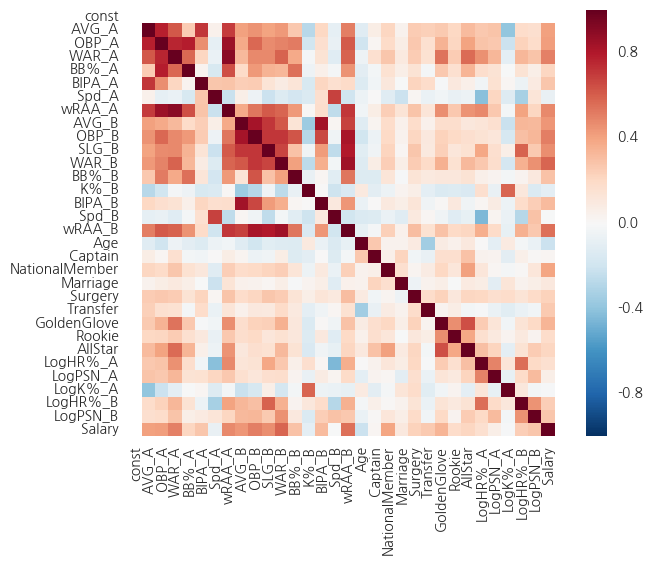

In [139]:
cormat = df_hitter2.corr()
sns.heatmap(cormat, square=True)
plt.show()

## wRAA_A , wRAA_B 제거 - 3차

In [140]:
del df_hitter2["wRAA_A"]
del df_hitter2["wRAA_B"]
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     5.075
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           1.36e-09
Time:                        11:43:37   Log-Likelihood:                -315.98
No. Observations:                 123   AIC:                             690.0
Df Residuals:                      94   BIC:                             771.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.9786     15.194      0.

 # 5. ETC 변수제거 

In [141]:
del df_hitter2["Captain"]
del df_hitter2["Transfer"]
del df_hitter2["Marriage"]
model_sm2 = sm.OLS(df_hitter2.ix[:,-1], df_hitter2.ix[:,:-1])
result_sm2 = model_sm2.fit()
print(result_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     5.848
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           1.03e-10
Time:                        11:44:19   Log-Likelihood:                -316.09
No. Observations:                 123   AIC:                             684.2
Df Residuals:                      97   BIC:                             757.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.5809     14.393      0.

In [142]:
df_hitter3 = df_hitter2

 # 6.  P>|t| 50% 이상 제거 --------------------- 보류

In [143]:
del df_hitter3["Spd_A"]
del df_hitter3["BIPA_A"]
del df_hitter3["OBP_B"]
del df_hitter3["BB%_B"]
del df_hitter3["Surgery"]
del df_hitter3["GoldenGlove"]
del df_hitter3["LogHR%_A"]
del df_hitter3["NationalMember"]

model_sm3 = sm.OLS(df_hitter3.ix[:,-1], df_hitter3.ix[:,:-1])
result_sm3 = model_sm3.fit()
print(result_sm3.summary())





                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     5.584
Date:                Thu, 02 Mar 2017   Prob (F-statistic):           9.27e-09
Time:                        11:45:14   Log-Likelihood:                -333.02
No. Observations:                 123   AIC:                             702.0
Df Residuals:                     105   BIC:                             752.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6865     12.259     -0.301      0.7

In [92]:
model = sm.OLS.from_formula("salary ~AVG_A+	OBP_A+	WAR_A+	BB%_B+	SLG_B+	WAR_B+ 	Spd_B+	Age +	Marriage+	LogPSN_A+	LogHR%_B ", data=df_hitter1



SyntaxError: unexpected EOF while parsing (<ipython-input-92-ba97fc1c192a>, line 1)